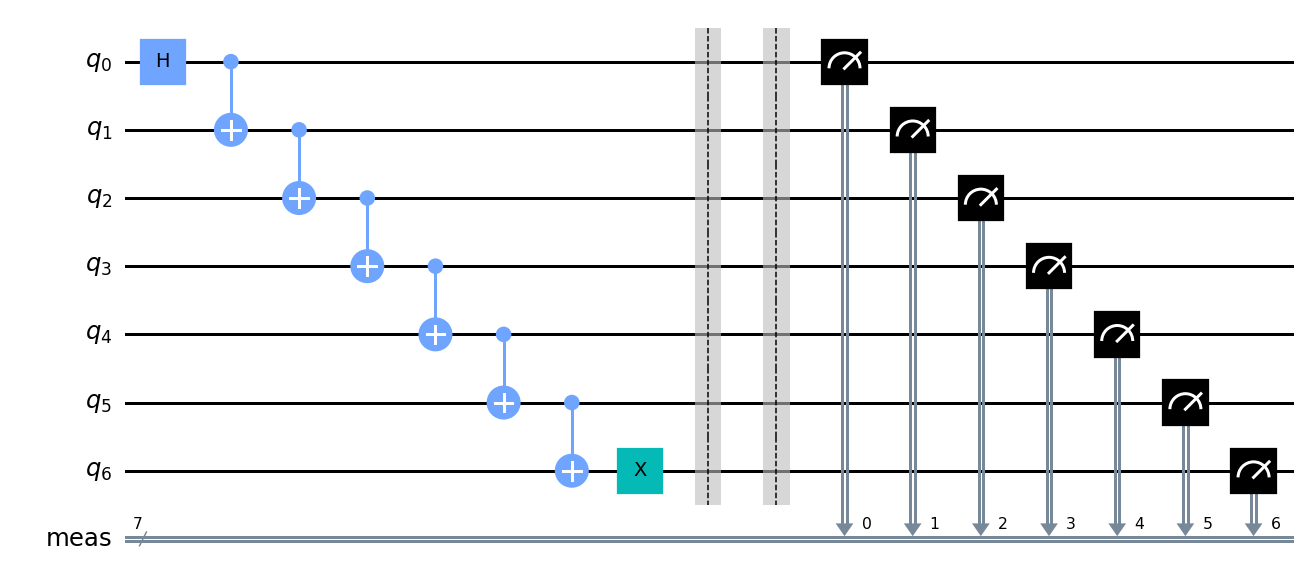

<IPython.core.display.Latex object>

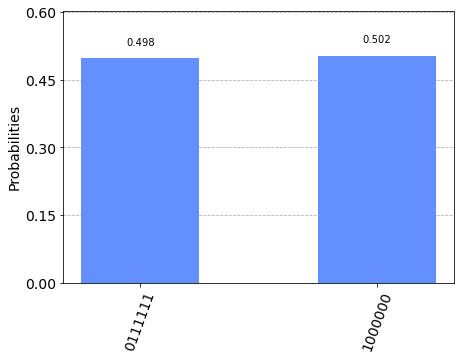

In [13]:
# quantum_circuit2.ipynb

# Cell 1 

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")

# Thinking for this circuit layout:
# Hadamrd causes q0 to be either 0 or 1
# If 1, all cx gates function and all other qbits become 1
# Not gate then flips q6 -> 0111111 = 63
# If 0, all cx gates pass the current values and all qbits stay 0
# Not gate then flips q6 -> 1000000 = 64
qc = QuantumCircuit(7)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cx(4, 5)
qc.cx(5, 6)
qc.x(6)
qc.save_statevector()
qc.measure_all()

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
display(array_to_latex(result.get_statevector(), prefix="\\text{Statevector} = "))

plot_histogram(counts)